## Figure 1A CRANE - Trend Lines WOS

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator

### Import CSV data
Source: Extracted by M.Gallant 04/01/19wos-per-year.csv exportWeb of Science (WOS) 

XML raw data (Web of Knowledge version 5) acquired from Clarivate Analytics by the IUNI Science of Science Hub and shared through a Data Custodian user agreement with the Cyberinfrastructure for Network Science Center(CNS) on July 16, 2018

In [0]:
# Change directory accordingly based on data file locations
    
data_import = pd.read_csv('Data/wos-per-year-1998-2017.csv', 
                          encoding='latin1', sep=",")  

wospub = pd.read_csv('Data/wos-all-merged-year-counts.csv', encoding='latin1', sep=",")

domain = pd.read_csv('Data/wos-three-domains-total-1998-2017.csv', encoding='latin1', sep=",")

citation = pd.read_csv('Data/wos-citations.csv', encoding='latin1', sep=",")

### Table Style

Setting up how the table looks, including: size, colors, margins, etc..

In [0]:
list(data_import)

['Year', 'Count']

In [0]:
w, h = plt.figaspect(1.618)
fig = plt.figure(figsize=(w, h),facecolor='white')

<Figure size 288x465.984 with 0 Axes>

In [0]:
plt.rcParams['axes.xmargin'] = 0 # remove whote margins
plt.rcParams['svg.fonttype'] = 'none' # for svg formatting
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 
plt.rcParams['font.sans-serif'] = "Arial"

plt.rcParams['font.family'] = "sans-serif"

np.seterr(divide='ignore', invalid='ignore') # to remove warning messages

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### Ploting Trend Lines

Plotting and formatting the data from given sources

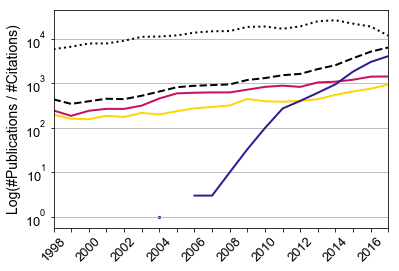

In [0]:
# Setting up table's formatting, including: axis, scale, data, etc..
x = data_import['Year'].values 
ax = plt.gca()
y = data_import['Count'].values
x1 = wospub.Year.values
ax.set_xlim((1998, 2017))
plt.yscale('log') 

# Plotting given data
ax.plot(x1, wospub.Count.values, linewidth=2.0, color='black',linestyle='dashed') # Total WOS publications (AI + Robotics + IoT)
ax.plot(x1, citation.total.values, linewidth=2.0, linestyle='dotted',color='black') # Total WOS citations (AI + Robotics + IoT)
ax.plot(x1, domain.AI.values, linewidth=2.0, color='#ffd600') # AI - Yellow
ax.plot(x1, domain.Rob.values, linewidth=2.0, color='#c51162') # Robotics - Red
ax.plot(x1, domain.IoT.values, linewidth=2.0, color='#311b92') # IoT - Blue
ax.scatter(2004, 1, s=5.0, color='#311b92') # IoT - Blue

# Finish table formatting: ticks, labeling, etc..
ax.set_yticks([1,10, 100, 1000, 10000])
ax.set_xticks([1998, 1999, 2000,2001,2002,2003, 2004,2005, 2006, 2007, 2008, 2009,2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
plt.xticks(rotation=45)
plt.setp(ax.get_xticklabels()[1::2], visible=False)
plt.minorticks_off()
ax.set_ylabel('Log(#Publications / #Citations)',  fontsize=14)
ax.grid(axis='y')
fig.tight_layout()

#Saving and displaying finished figures
plt.savefig('Figures/Figure1A-counts.svg')
plt.savefig('Figures/Figure1A-counts.png')
plt.show()